In [1]:
from astropy.convolution import *
import sys
import os
sys.path.append(os.path.abspath('..'))
%matplotlib notebook
# utils=os.path.abspath('..')
from utils import *
import time
from KBs import *
(HTML(tog))


global log
log = []

In [2]:
# tog

In [3]:
# convolve_int=lambda a,fir,method:np.around(convolve(a,fir,method)).astype(np.int);

def csv2dat(fname):
    import csv 
    import numpy as np
    global log
    dat=[];
    with open(fname, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter='\t')
        for row in (spamreader):
            dat+=[row];

    log = log + ['Used \''+fname+'\' as input '];


    return (np.array(dat));

# if not 'input_rulestr' in locals():
#     input_rulestr='000000000060031c61c67f86a0';
# input_rulestr
# CA_sys

In [ ]:
def profile(input_list, log = []):
    # global log
    output_data=[];    
    repeat=2;
    # input_list=[input_rulestr];
    ipt_list=input_list*repeat;
    # for i in range(5):
    l_ipt=len(input_list)
    log += ['Log of the process:'];
    logs='Starting to profile {:d} rules at {:d} replicates,\n totaling {:d} instances'.format(l_ipt,repeat,l_ipt*repeat);
    log += [logs];
    # print('Starting to profile {:d} rules at {:d} replicates,\n totaling {:d} instances'.format(l_ipt,repeat,l_ipt*repeat))

    for num,rulestr in enumerate(ipt_list):
        ca1=CA_sys(familyname,rulestr,[400,100,400]);
        ca1.rulestr2alias();
        s=measure_temperature(ca1,hdist);
        output_data+=[s];
    #     print('{:d} of {:d}'.format(num,len(ipt_list)))
        logs =('{:d} of {:d} '.format(num,len(ipt_list)));
        log += [logs];
    temp_data=[];
    # sample_data=[]
    for line in output_data:
        temp_data+=[line.rstrip('\n').split('\t')];
    sample_data=np.array(temp_data)
    # print('data is succesfully generated at {:d} replicates'.format(repeat))
    logs=('data is succesfully generated at {:d} replicates'.format(repeat))

    log  += [logs];

    # print('\n Detail of the input:')
    logs='\n Detail of the input:';
    log+=[logs];
    for k,v in ca1.__dict__.items():
        if not callable(v):
    #         print(k+str(v).ljust(-10))
    #         print("{:5} {:<15} {:<10}".format('',k, str(v)))

            logs=("{:5} {:<15} {:<10}".format('',k, str(v)));
            log+=[logs];
    return( [sample_data,log]);

In [3]:
# #test
# ca1=CA_sys('2dntca',input_rulestr,[600,100,400]);
# ca1.rulestr2alias();
# s=measure_temperature(ca1,hdist);
# output_data=[];
from os import environ
# global log
# log=[];
if 'query' not in locals():
    query = environ.get('query');
    if not query==None:        
        query = environ['query'];
        if query[-4:]=='.csv':
            query_type = 'csv';
        else:
            query_type = 'rulestr';
#             familyname, input_rulestr = query.split('_');
    else:
    #     familynam
        query='2dntca_000000000060031c61c67f86a0';
        query_type = 'rulestr'
#         familyname, input_rulestr = query.split('_');
        log+=['fail to fetch query, using default rule, B3/S23 \n' +
        'example query:'+query];
        ## Using B3/S23 as example

if query_type == 'csv':
#     sample_dat, log = 
    sample_data=csv2dat('../calc_temp_data/'+query);
    print('data loaded')
if query_type == 'rulestr':
    familyname, input_rulestr = query.split('_');
    sample_data,log = profile([input_rulestr],log)
    log+=['data generated for '+query];

NameError: global name 'log' is not defined

In [8]:
# import numpy as np

# # TEST sample_data
# sample_data=np.array([['2dntca_b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk',
#         '000000000060031c61c67f86a0', '99', '0.148772', '0.087523',
#         '0.089563'],
#        ['2dntca_b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk',
#         '000000000060031c61c67f86a0', '99', '0.152794', '0.086693',
#         '0.091644'],
#        ['2dntca_b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk',
#         '000000000060031c61c67f86a0', '99', '0.148733', '0.089657',
#         '0.089387'],
#        ['2dntca_b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk',
#         '000000000060031c61c67f86a0', '99', '0.150105', '0.092000',
#         '0.090981'],
#        ['2dntca_b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk',
#         '000000000060031c61c67f86a0', '99', '0.153150', '0.089772',
#         '0.090938']], 
#       dtype='<U46')

## Landscape of the dynamics
* Each point represent a single Cellular Automata. The position of the point indicates the characteristic of its dynamics. The red patch on the right indicates the disordered cluster, whereas the yellow patch on the lower-left indicate the ordered cluster. Anything outside represents some intermediate behaviour. 
* The green patch indicates complex dynamics of particular interest.
* Hover on the point to display the rule-string of a single point. Click to display the rulestring as a copyable string, and open a simulator in a new pop-up window. (The simulator is provided by lv-plugin.js at http://lazyslug.no-ip.biz/lifeview/plugin/js/)
* Click on the bottom-left widgets to Zoom-and-pan

In [9]:
viewer='''<script src="lv-plugin.js"></script>\n
<meta name="LifeViewer" content="viewer textarea 60 hide">\n
<div class="viewer" id="viewer"><textarea id="textarea">bob!</textarea><br><canvas id="cv1" width="480" height="480"></canvas></div>\n''';
# HTML(viewer)

In [10]:
%%html
<script>
String.prototype.formatUnicorn = String.prototype.formatUnicorn ||
function () {
    "use strict";
    var str = this.toString();
    if (arguments.length) {
        var t = typeof arguments[0];
        var key;
        var args = ("string" === t || "number" === t) ?
            Array.prototype.slice.call(arguments)
            : arguments[0];

        for (key in args) {
            str = str.replace(new RegExp("\\{" + key + "\\}", "gi"), args[key]);
        }
    }

    return str;
};

var s= new String("");
var soup=new String("3bo4b11o2b2ob2o2bobo$obobo2bo3bobo3bo2bob3ob2o$2b3obobob6o3b5o2bo2bo$bob2o3b2ob2ob3o4bo5bob2o$2o3b3o3bob4ob2o4bobob2o$5bo4bo4b2obo3b3o2bo$o2bob3obob4o4b3obob2obobo$3bo4bob5o5b3ob2o2b2o$2b3obob2ob4o2bo3bobo3bo$bo4bob2ob6obo3bo4bob2o$5b4obo3bo4bo5bo2bo$ob2obobo2bob2o2bobo2bo2b2o4bo$obo2b2ob2o2b2o3bo2b2obobob4o$6ob2ob2o3b2ob4obo3bob2o$3ob3obo2b3ob4ob4o5bo$obobo7bo3b2o6b3o3bo$bob3o6bob2ob2o3b4obob2o$o2b2o2bo2bo2bobob7ob2o3bo$2obo2bo2b5ob2obo3b2o4b2o$b2o2bob5obo2b5o2bob4o$2o2b4ob2ob4obo3bob3obo2bo$b2o3bo2bo3b6o2bo3bo2bo$bobo3b2ob2o3b3obo3bo5bo$o4b8obobobobob2ob2ob2o$3obo3b4obo3bob3obobo$o3b2obobob2o2b2o5bob2o$6bo5bob2o3b2obo2b2obo$7bo2b2obo2bobobo3bobo2b2o$2o4b7o4bo2b2ob2o3bo$o2bo3bobo3b4o2bo3b2obobo!");
var rule="b3s23578";
var template="x = 300, y = 300, rule = {0} \n {1}";
var div_template="<textarea>{0}</textarea><br><canvas width=\"480\" height=\"480\" tabindex=\"1\"></canvas>";

//s=template.formatUnicorn("B3/S23","bbboooobbbboo!");
//var s="<textarea>x = 300, y = 300, rule = B3/S238 \nbobbbbbbooooooo!</textarea><br><canvas width=\"480\" height=\"480\"></canvas>";
//alert(s)
var s = template.formatUnicorn(rule,soup)
//document.getElementById("viewer").innerHTML = s;
</script>





/home/shouldsee/.local/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


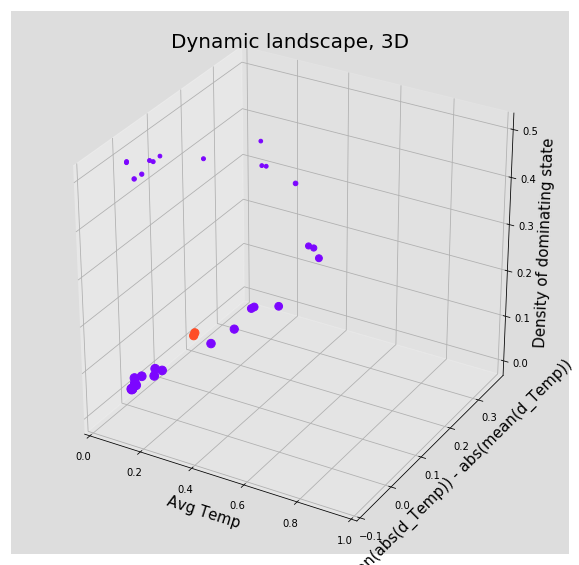

In [11]:
### Plotting sample_data

%matplotlib inline

# mpld3.enable_notebook()
from graphics import *
fig, ax = plt.subplots(subplot_kw=dict(axisbg='#DDDDDD'
#                                        ,projection='3d'
                                      ))
fig.set_size_inches([6,6])

ax.grid(color='white', linestyle='solid')
ax.set_ylim(-.1,0.38)
ax.set_xlim(0,1)

fig2,ax2=plt.subplots(subplot_kw=dict(axisbg='#DDDDDD'
                                       ,projection='3d'
                                      ))
fig2.set_size_inches([10,10])
# fig2.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.3)

ax2.grid(color='white', linestyle='solid')
ax2.set_ylim(-.1,0.38)
ax2.set_xlim(0,1)

fig,ax,fig2,ax2 = make_figure((fig,ax,fig2,ax2),sample_data)
fig.set_size_inches([7,7])
ax.set_ylim(-.1,0.38)
ax.set_xlim(0,1)

# display(HTML(viewer))



mpld3.display(fig)
# mpld3.display(fig2)





In [6]:
print {'b':{'1':['1e','1k']},'s':{'1':['1e','1k']}}



{'s': {'1': ['1e', '1k']}, 'b': {'1': ['1e', '1k']}}


In [7]:
# len(KBs.henseldict)
# len(KBs.rca2ntca)
# KBs.henseldict[:51]
from KBs import *
import itertools
import collections
if 1:
        OUT = ''
        rulestr =  '000000000060031c61c67f86a0'
        r=hex2bin(rulestr,102);
        r=r[::-1];
        rule=[i for i,x in enumerate(r) if x=='1'];
#         print r
        lst = [henseldict[i] for i in rule]
        lst.sort()
        
        #### group by B/S
        d = collections.OrderedDict((('b',{}),('s',{}))) ### set default
#         d = {'b':{},'s':{}}   ### set default
        d.update(
            {k:list(gp) for k,gp in itertools.groupby(lst, lambda x:x[0])}        
        )
        for k,lst in d.iteritems():
            d[k] = {k:list(gp) for k,gp in itertools.groupby(lst, lambda x:x[1])}
            
        for bs, dd in d.iteritems():
            OUT += bs
            for k,lst in dd.iteritems():
                OUT += k + ''.join( conf[-1] for conf in lst)
        OUT = OUT.replace('_','')
        alias = OUT
#         return OUT
print OUT
# t

b3aceijknqrys3aceijknqry2aceikn


In [27]:
print lst.sort()
# lst

None


['b3a',
 'b3c',
 'b3e',
 'b3i',
 'b3j',
 'b3k',
 'b3n',
 'b3q',
 'b3r',
 'b3y',
 's2a',
 's2c',
 's2e',
 's2i',
 's2k',
 's2n',
 's3a',
 's3c',
 's3e',
 's3i',
 's3j',
 's3k',
 's3n',
 's3q',
 's3r',
 's3y']

In [7]:
        from KBs import *
        OUT = ''
        rulestr =  '131c3c3c001fff03e03e000ea0'
        r=hex2bin(rulestr,102);
        r=r[::-1];
        rule=[i for i,x in enumerate(r) if x=='1'];
#         print r
        lst = [henseldict[i] for i in rule]
        lst.sort()
        print lst
        raise(Exception('stop'))
        #### group by B/S
        d = collections.OrderedDict((('b',{}),('s',{}))) ### set default
#         d = {'b':{},'s':{}}   ### set default
        d.update(
            {k:list(gp) for k,gp in itertools.groupby(lst, lambda x:x[0])}        
        )
        for k,lst in d.iteritems():
            d[k] = {k:list(gp) for k,gp in itertools.groupby(lst, lambda x:x[1])}
            
        for bs, dd in d.iteritems():
            OUT += bs
            for k,lst in dd.iteritems():
                OUT += k + ''.join( conf[-1] for conf in lst)
        OUT = OUT.replace('_','')
        alias = OUT

['b3a', 'b3c', 'b3e', 'b3i', 'b3j', 'b3k', 'b3n', 'b3q', 'b3r', 'b3y', 'b4a', 'b4c', 'b4e', 'b4i', 'b4j', 'b4k', 'b4n', 'b4q', 'b4r', 'b4t', 'b4w', 'b4y', 'b4z', 'b5a', 'b5c', 'b5e', 'b5i', 'b5j', 'b5k', 'b5n', 'b5q', 'b5r', 'b5y', 'b6a', 'b6c', 'b6e', 'b6i', 'b6k', 'b6n', 'b7c', 'b7e', 'b8_']


Exception: stop

In [11]:
import re
alias = 'b3_/s23'
p_clean = re.compile(r'[^\da-zA-Z]')
alias = p_clean.sub( '', alias)
print alias

b3s23


In [70]:
p_NOTnumletter = re.compile(r'[^\da-zA-Z]')
alias = 'b3_/s2'
alias = p_NOTnumletter.sub( '', alias)
OUT = ['0']*102

d = collections.OrderedDict((('b',{}),('s',{}))) ### set default
# d.update()
# alias.split('s')
s = alias
lst = [x for x  in re.split("([bs])", s) if x]
if len(lst) % 2: #### Padding to even length
    lst += ['']
d  = dict(ntuple(lst,2))

idxs = []
for k, v in d.iteritems():
    s = v
    lst = [x for x in re.split("(\d)", s) if x]
    L  = len(lst)
    v_old = ''
    for i,v in enumerate(lst):
        if v.isdigit():
            if v_old.isdigit():
                idx = [henselidx.get( k + v_old + i,None) for i in subconf]
                idxs.extend(idx)
            if i + 1 == L:
                idx = [henselidx.get( k + v + i,None) for i in subconf]
                idxs.extend(idx)
        else:
            idx = [henselidx[ k + num + v_i]  for v_i in v ]
            idxs.extend(idx)
        v_old = v

idxs = [ x for x in idxs if x is not None] 
for i in idxs:
    if not i is None:
        OUT[i] = '1'
bitstr=''.join(OUT[::-1]);
hexstr=hex(int(bitstr,2)).lstrip('0x').rstrip('L').zfill(26)
return hexstr

# print idxs
#     print ntuple([x for x  in re.split("(\d)", v)],2)
#     d[k] = dict(ntuple([x for x  in re.split("(\d)", v) if x],2))
# print d
hexstr = kb.alias2rulestr("B3/S2")
print hexstr
print kb.rulestr2alias(rulestr)
print kb.rulestr2alias(hexstr)

000000000000030460461586a0
000000000000030060060006a0
b3aceijknqrys2aceikn
b3aceijknqrys


In [ ]:
KB

In [46]:
''.isdigit()

False

In [8]:
# self.s=['0']*102;       

while True:
    prime=ali[0];
    ali=ali[1:];
    sold=[];
    # sold=ali[0];
    # nold=
    neg=0;
    for i,s in enumerate(ali):
        if s.isdigit(): 
            neg=0;      
            if sold==[]:
                pass
            elif sold.isdigit():
                add_all(self.s,prime,sold);
                # golly.note('added all of '+prime+sold)
            nold=s;

        elif s in ['b','s']:
            ali=ali[i:];
            break
        elif s=='-':
            neg=1;
            add_all(self.s,prime,nold);
            # golly.note('added all of '+prime+sold)
        else:
            conf=prime+nold+s;
            self.s[henselidx[conf]]=str(1-neg);
            # golly.note('added '+conf)
        alii=ali[i+1:];
        sold=s;
        # golly.note(alii)  
    if sold.isdigit():
        add_all(self.s,prime,sold);
        # golly.note('added all of '+prime+s)
    if i+1==len(ali):
        break
ruleprj=''.join(self.s[::-1]);
rulestr=hex(int(ruleprj,2)).lstrip('0x').rstrip('L').zfill(26);
return rulestr

NameError: name 'ali' is not defined

In [10]:
from KBs import *
class kb_2dntca():
    def __init__(self):
        pass
    def rulestr2alias(self, rulestr):
        OUT = ''
        # rulestr =  '000000000060031c61c67f86a0'
        r=hex2bin(rulestr,102);
        r=r[::-1];
        rule=[i for i,x in enumerate(r) if x=='1'];
#         print r
        lst = [henseldict[i] for i in rule]
        lst.sort()
        
        #### group by B/S
        d = collections.OrderedDict((('b',{}),('s',{}))) ### set default
#         d = {'b':{},'s':{}}   ### set default
        d.update(
            {k:list(gp) for k,gp in itertools.groupby(lst, lambda x:x[0])}        
        )
        for k,lst in d.iteritems():
            d[k] = {k:list(gp) for k,gp in itertools.groupby(lst, lambda x:x[1])}
            
        for bs, dd in d.iteritems():
            OUT += bs
            for k,lst in dd.iteritems():
                OUT += k + ''.join( conf[-1] for conf in lst)
        OUT = OUT.replace('_','')
        alias = OUT
        return alias

    def alias2rulestr(self, alias):
        alias = p_NOTnumletter.sub( '', alias).lower()
        OUT = ['0']*102
        print alias
        d = collections.OrderedDict((('b',{}),('s',{}))) ### set default
        # d.update()
        # alias.split('s')
        s = alias
        lst = [x for x  in re.split("([bs])", s) if x]
        if len(lst) % 2: #### Padding to even length
            lst += ['']
        d  = dict(ntuple(lst,2))
        idxs = []
        for k, v in d.iteritems():
            s = v
            lst = [x for x in re.split("(\d)", s) if x]
            L  = len(lst)
            v_old = ''
            for i,v in enumerate(lst):
                if v.isdigit():
                    if v_old.isdigit():
                        idx = [henselidx.get( k + v_old + c,None) for c in subconf]
                        idxs.extend(idx)
                    if i + 1 == L:
                        idx = [henselidx.get( k + v + c,None) for c in subconf]
                        idxs.extend(idx)
                else:
                    idx = [henselidx[ k + num + v_i]  for v_i in v ]
                    idxs.extend(idx)
                v_old = v
        idxs = [ x for x in idxs if x is not None] 
        for i in idxs:
            if not i is None:
                OUT[i] = '1'
        bitstr=''.join(OUT[::-1]);
        hexstr=hex(int(bitstr,2)).lstrip('0x').rstrip('L').zfill(26)
        return hexstr
    def rulestr2adv(self,rulestr):
        ruleprj=np.array( 
            list(hex2bin(rulestr,102)[::-1]),
            np.int);
 

In [3]:
# mpld3.display(fig)
import KBs

kb = KBs.kb_2dntca()

hexstr = kb.alias2rulestr("B345678/S012678")
# hexstr = kb.alias2rulestr("B3/S23")
print hexstr
kb.rulestr2alias(hexstr)

b345678s012678
3f9fbe3e001fff07e07e15fea0


'b3aceijknqry5aceijknqry4aceijknqrtwyz7ce6aceikn8s1ce02aceikn7ce6aceikn8'

In [ ]:
'b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk'
{'b':{'3':('3i','3a','3n','3j','3r','3e','3c','3q','3y','3k','3s')}

In [13]:
import numpy as np

sum(float(x)>0.3 for x in list(sample_data[:,3]))/sample_data.shape[0]

0.0

In [14]:
# len(ntca_list)
# .shape
# print(tst_data)
print('\n'.join(log));

Log of the process:
Starting to profile 1 rules at 2 replicates,
 totaling 2 instances
0 of 2 
1 of 2 
data is succesfully generated at 2 replicates

 Detail of the input:
      hmax            100       
      siz             (400, 20, 20)
      alias           b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk
      N               400       
      dimsiz          [400, 100, 400]
      familyname      2dntca    
      rulestr         000000000060031c61c67f86a0
data generated for 2dntca_000000000060031c61c67f86a0


In [15]:
# from nbconvert import HTMLExporter
# import codecs
# import nbformat
# exporter = HTMLExporter()
# # execfile()
# output_notebook = nbformat.read('calc_temp.ipynb', as_version=4)
# output, resources = exporter.from_notebook_node(output_notebook)
# codecs.open('test.html', 'w', encoding='utf-8').write(output)